##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwórz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

In [2]:
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [10]:
scores=pd.read_csv("SCORES.csv")
print(scores.head(),"\n")
print(scores.describe(),"\n")
print("rozmiar df",scores.shape,"\n")

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30 

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000 

rozmiar df (25, 2) 



Text(0, 0.5, 'Wynik - uzyskane punkty')

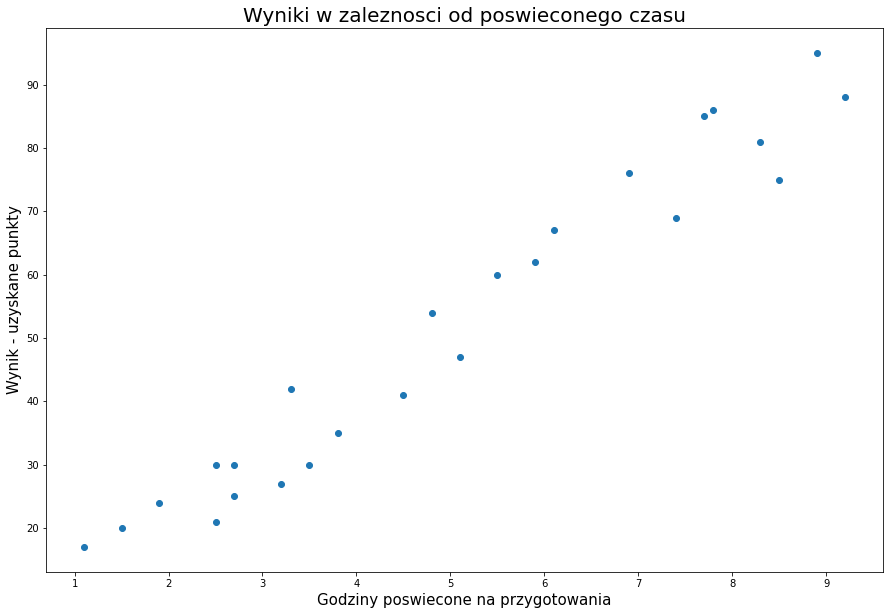

In [11]:
plt.figure(figsize=(15, 10))
plt.scatter(x=scores.Hours, y=scores.Scores)
plt.title("Wyniki w zaleznosci od poswieconego czasu", fontsize=20)
plt.xlabel("Godziny poswiecone na przygotowania", fontsize=15)
plt.ylabel("Wynik - uzyskane punkty", fontsize=15)

In [36]:
dane_wej=scores.Hours
dane_wyj=scores.Scores

X_train,X_test,Y_train,Y_test=train_test_split(dane_wej,dane_wyj,train_size=0.3,random_state=42)
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()
# Konwewrsja wketora w macierz
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
Y_train=Y_train.reshape(-1,1)
Y_test=Y_test.reshape(-1,1)

print("X_train:\n", X_train)
print("y_train:\n", Y_train)
print("X_test:\n", X_test)
print("y_test:\n", Y_test)

X_train:
 [[6.1]
 [7.8]
 [5.5]
 [7.7]
 [1.1]
 [7.4]
 [9.2]]
y_train:
 [[67]
 [86]
 [60]
 [85]
 [17]
 [69]
 [88]]
X_test:
 [[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]
 [2.7]
 [3.3]
 [5.1]
 [3.8]
 [1.5]
 [3.2]
 [4.5]
 [8.9]
 [8.5]
 [3.5]
 [2.7]
 [1.9]
 [4.8]]
y_test:
 [[81]
 [30]
 [21]
 [76]
 [62]
 [25]
 [42]
 [47]
 [35]
 [20]
 [27]
 [41]
 [95]
 [75]
 [30]
 [30]
 [24]
 [54]]


In [37]:
# Model regresji
reg = LinearRegression().fit(X_train, Y_train)
# Cooficient of determination - Współczynnik determinacji = jedna z miar jakości dopasowania modelu do danych uczących.
print(f"Cooficient of determination: {reg.score(X_train, Y_train)}")

Cooficient of determination: 0.9570559793393358


In [38]:
# slope - stromość linii regresji. Slope i Intercept przecięcia mogą być użyte do zdefiniowania zależności liniowej między dwiema zmiennymi: y=ax+b.
print(f"Slope b1 = {reg.coef_}")

Slope b1 = [[9.21166827]]


In [39]:
# Intercept- miejsce, w którym nachylenie przecina oś Y oznaczoną jako b w równaniu nachylenia y=ax+b.
print(f"intercept b0: {reg.intercept_}")

intercept b0: [8.47389448]


In [40]:
Y_pred=reg.predict(X_test)
print("y_pred= \n", Y_pred,"\n y_test= \n",Y_test)

y_pred= 
 [[84.93074115]
 [31.50306516]
 [31.50306516]
 [72.03440557]
 [62.82273729]
 [33.34539882]
 [38.87239978]
 [55.45340267]
 [43.47823392]
 [22.29139689]
 [37.95123295]
 [49.92640171]
 [90.45774211]
 [86.7730748 ]
 [40.71473343]
 [33.34539882]
 [25.9760642 ]
 [52.68990219]] 
 y_test= 
 [[81]
 [30]
 [21]
 [76]
 [62]
 [25]
 [42]
 [47]
 [35]
 [20]
 [27]
 [41]
 [95]
 [75]
 [30]
 [30]
 [24]
 [54]]


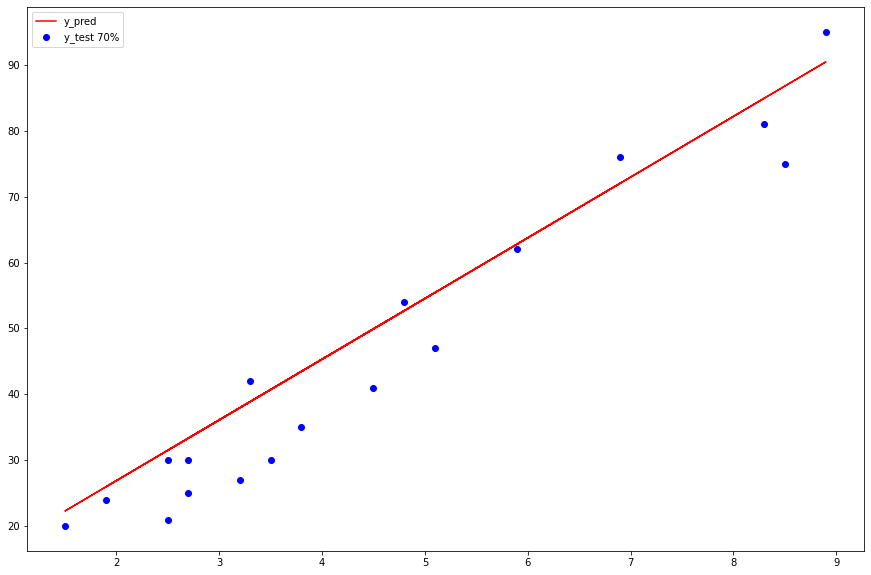

In [41]:
plt.figure(figsize=(15, 10))
plt.plot(X_test, Y_pred, label="y_pred", color='red')
plt.scatter(X_test, Y_test, label="y_test 70%", color='blue')
plt.legend()
plt.show()

In [43]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error - ", mae,"\nMean Squared Error - ", mse, "\nRoot Mean Squared Error - ",rmse)

Mean Absolute Error -  5.831138739648878 
Mean Squared Error -  47.93953418053297 
Root Mean Squared Error -  6.923838110508721


SBP

In [46]:
sbp=pd.read_csv("SBP.csv")
print(sbp.head(),"\n")
print(sbp.describe(),"\n")
print("rozmiar df",sbp.shape,"\n")

   Age  SBP
0   60  117
1   61  120
2   74  145
3   57  129
4   63  132 

             Age         SBP
count  19.000000   19.000000
mean   64.947368  129.421053
std     7.214751   13.454928
min    54.000000  111.000000
25%    60.500000  119.000000
50%    63.000000  129.000000
75%    68.500000  137.000000
max    79.000000  163.000000 

rozmiar df (19, 2) 



Text(0, 0.5, 'SBP')

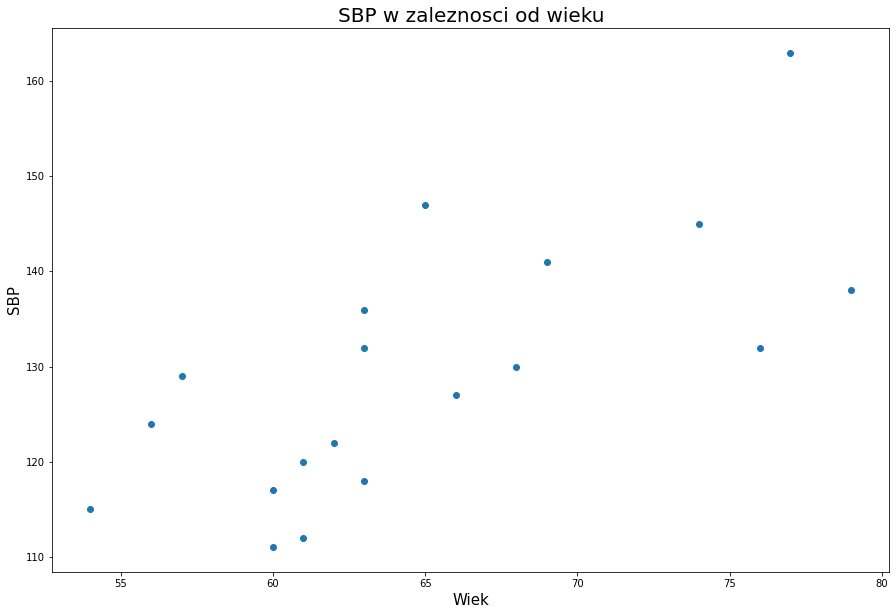

In [64]:
plt.figure(figsize=(15, 10))
plt.scatter(x=sbp.Age, y=sbp.SBP)
plt.title("SBP w zaleznosci od wieku", fontsize=20)
plt.xlabel("Wiek", fontsize=15)
plt.ylabel("SBP", fontsize=15)

In [52]:
dane_wej2=sbp.Age
dane_wyj2=sbp.SBP

X_train2,X_test2,Y_train2,Y_test2=train_test_split(dane_wej2,dane_wyj2,train_size=0.3,random_state=42)
X_train2 = X_train2.to_numpy()
Y_train2 = Y_train2.to_numpy()
X_test2 = X_test2.to_numpy()
Y_test2 = Y_test2.to_numpy()
# Konwewrsja wketora w macierz
X_train2=X_train2.reshape(-1,1)
X_test2=X_test2.reshape(-1,1)
Y_train2=Y_train2.reshape(-1,1)
Y_test2=Y_test2.reshape(-1,1)

print("X_train:\n", X_train2)
print("y_train:\n", Y_train2)
print("X_test:\n", X_test2)
print("y_test:\n", Y_test2)

X_train:
 [[60]
 [77]
 [63]
 [65]
 [66]]
y_train:
 [[111]
 [163]
 [118]
 [147]
 [127]]
X_test:
 [[60]
 [68]
 [76]
 [61]
 [63]
 [69]
 [57]
 [61]
 [79]
 [56]
 [74]
 [54]
 [62]
 [63]]
y_test:
 [[117]
 [130]
 [132]
 [120]
 [136]
 [141]
 [129]
 [112]
 [138]
 [124]
 [145]
 [115]
 [122]
 [132]]


In [53]:
# Model regresji
reg = LinearRegression().fit(X_train2, Y_train2)
# Cooficient of determination - Współczynnik determinacji = jedna z miar jakości dopasowania modelu do danych uczących.
print(f"Cooficient of determination: {reg.score(X_train2, Y_train2)}")

Cooficient of determination: 0.7909312706288685


In [54]:
# slope - stromość linii regresji. Slope i Intercept przecięcia mogą być użyte do zdefiniowania zależności liniowej między dwiema zmiennymi: y=ax+b.
print(f"Slope b1 = {reg.coef_}")

Slope b1 = [[2.95443645]]


In [55]:
# Intercept- miejsce, w którym nachylenie przecina oś Y oznaczoną jako b w równaniu nachylenia y=ax+b.
print(f"intercept b0: {reg.intercept_}")

intercept b0: [-62.38369305]


In [56]:
Y_pred2=reg.predict(X_test2)
print("y_pred= \n", Y_pred2,"\n y_test= \n",Y_test2)

y_pred= 
 [[114.882494  ]
 [138.51798561]
 [162.15347722]
 [117.83693046]
 [123.74580336]
 [141.47242206]
 [106.01918465]
 [117.83693046]
 [171.01678657]
 [103.0647482 ]
 [156.24460432]
 [ 97.1558753 ]
 [120.79136691]
 [123.74580336]] 
 y_test= 
 [[117]
 [130]
 [132]
 [120]
 [136]
 [141]
 [129]
 [112]
 [138]
 [124]
 [145]
 [115]
 [122]
 [132]]


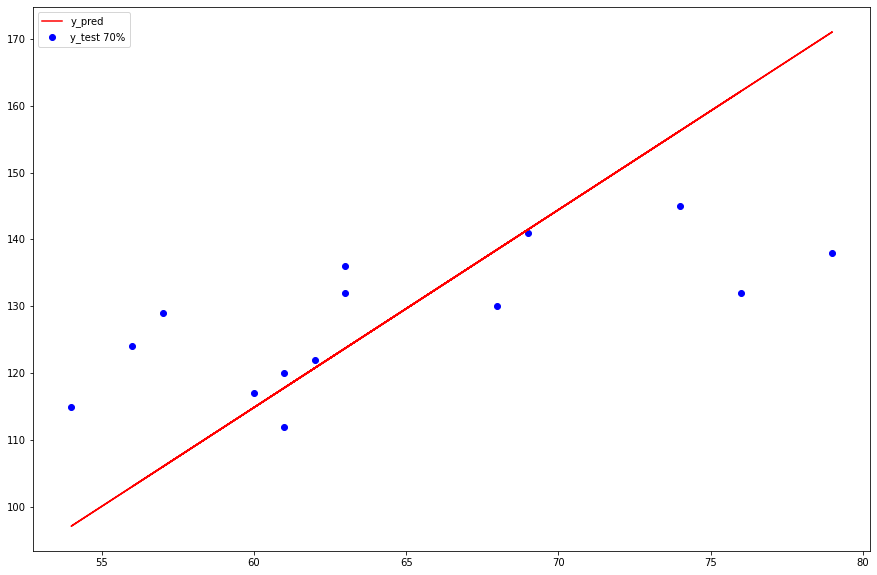

In [57]:
plt.figure(figsize=(15, 10))
plt.plot(X_test2, Y_pred2, label="y_pred", color='red')
plt.scatter(X_test2, Y_test2, label="y_test 70%", color='blue')
plt.legend()
plt.show()

In [58]:
mae2 = mean_absolute_error(Y_test2, Y_pred2)
mse2 = mean_squared_error(Y_test2, Y_pred2)
rmse2 = np.sqrt(mse2)

print("Mean Absolute Error - ", mae2,"\nMean Squared Error - ", mse2, "\nRoot Mean Squared Error - ",rmse2)

Mean Absolute Error -  12.64285714285715 
Mean Squared Error -  267.5976107089664 
Root Mean Squared Error -  16.35841100807063


### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

In [59]:
petrol=pd.read_csv("PETROL.csv")
print(petrol.head(),"\n")
print(petrol.describe(),"\n")
print("rozmiar df",petrol.shape,"\n")

   Podatek_paliwowy  Sredni_przychod  Utwardzone_autostrady  \
0               9.0             3571                   1976   
1               9.0             4092                   1250   
2               9.0             3865                   1586   
3               7.5             4870                   2351   
4               8.0             4399                    431   

   Procent_ludnosci_z_prawem_jazdy  Zuzycie_paliwa  
0                            0.525             541  
1                            0.572             524  
2                            0.580             561  
3                            0.529             414  
4                            0.544             410   

       Podatek_paliwowy  Sredni_przychod  Utwardzone_autostrady  \
count         48.000000        48.000000              48.000000   
mean           7.668333      4241.833333            5565.416667   
std            0.950770       573.623768            3491.507166   
min            5.000000      3063

Text(0, 0.5, 'Podatek paliwowy')

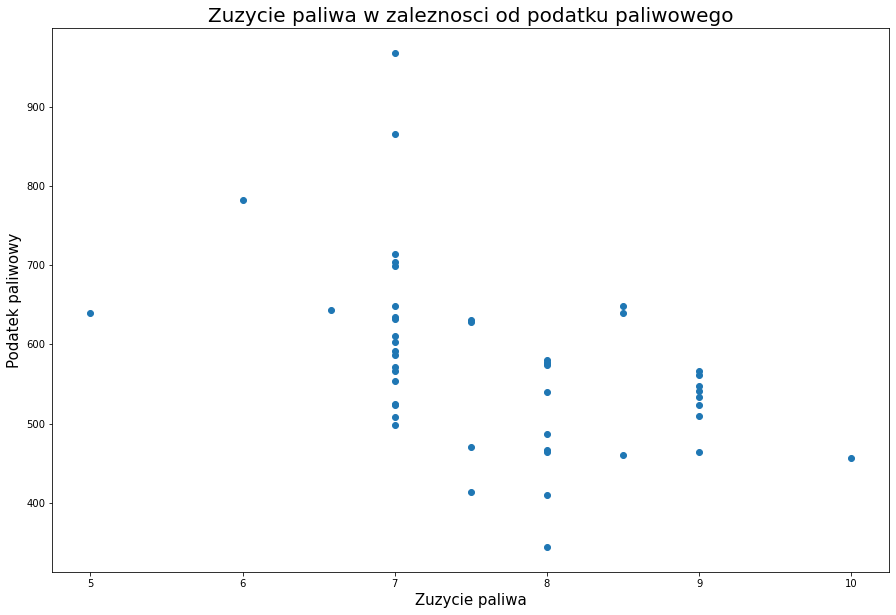

In [68]:
plt.figure(figsize=(15, 10))
plt.scatter(x=petrol.Podatek_paliwowy, y=petrol.Zuzycie_paliwa)
plt.title("Zuzycie paliwa w zaleznosci od podatku paliwowego", fontsize=20)
plt.xlabel("Zuzycie paliwa", fontsize=15)
plt.ylabel("Podatek paliwowy", fontsize=15)

Text(0, 0.5, 'Sredni przychod')

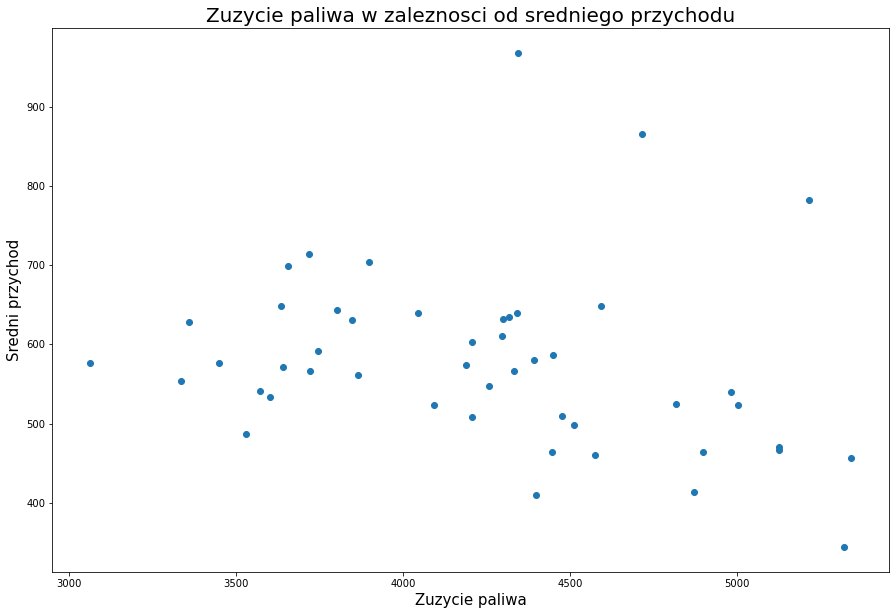

In [73]:
plt.figure(figsize=(15, 10))
plt.scatter(x=petrol.Sredni_przychod, y=petrol.Zuzycie_paliwa)
plt.title("Zuzycie paliwa w zaleznosci od sredniego przychodu", fontsize=20)
plt.xlabel("Zuzycie paliwa", fontsize=15)
plt.ylabel("Sredni przychod", fontsize=15)

Text(0, 0.5, 'Ilosc utwadzonych autostrad')

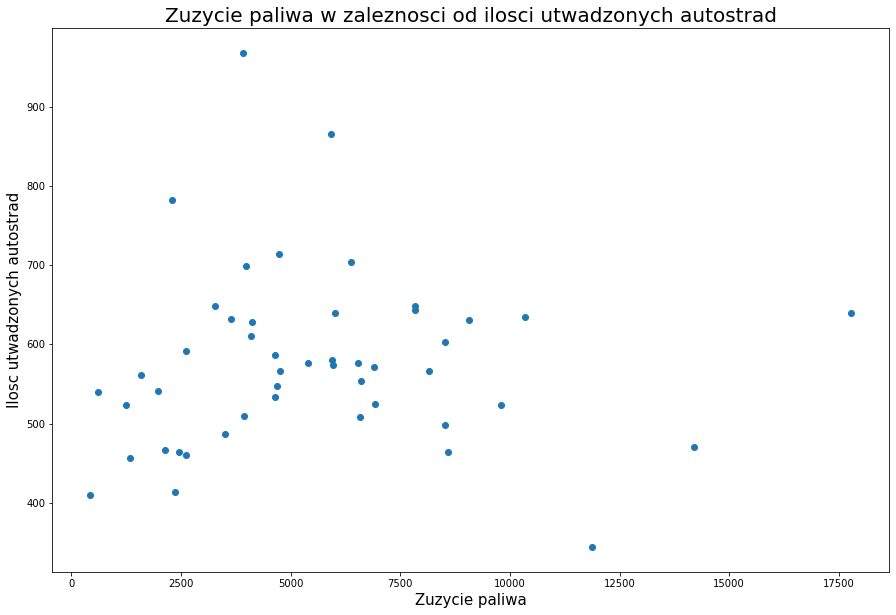

In [74]:
plt.figure(figsize=(15, 10))
plt.scatter(x=petrol.Utwardzone_autostrady, y=petrol.Zuzycie_paliwa)
plt.title("Zuzycie paliwa w zaleznosci od ilosci utwadzonych autostrad", fontsize=20)
plt.xlabel("Zuzycie paliwa", fontsize=15)
plt.ylabel("Ilosc utwadzonych autostrad", fontsize=15)

Text(0, 0.5, 'Procent ludzi z prawem jazdy')

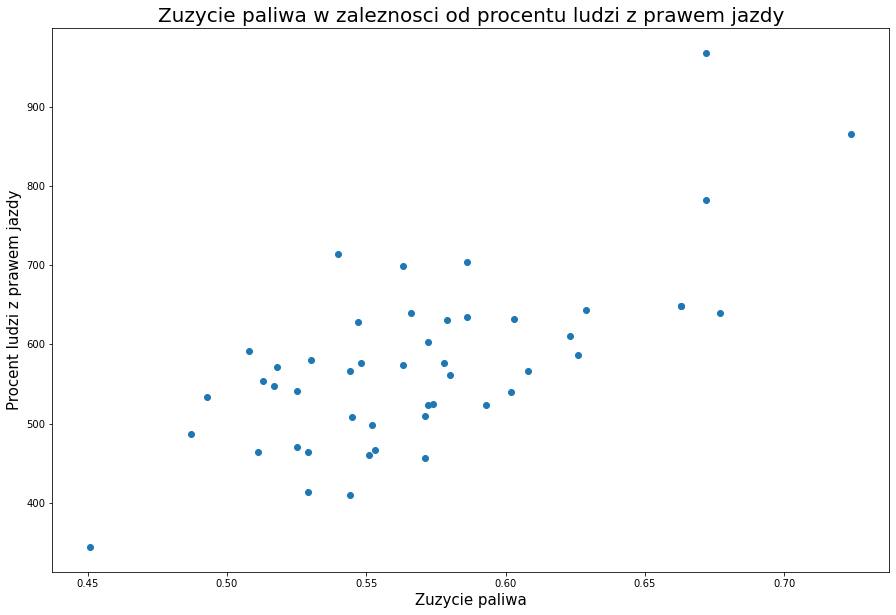

In [75]:
plt.figure(figsize=(15, 10))
plt.scatter(x=petrol.Procent_ludnosci_z_prawem_jazdy, y=petrol.Zuzycie_paliwa)
plt.title("Zuzycie paliwa w zaleznosci od procentu ludzi z prawem jazdy", fontsize=20)
plt.xlabel("Zuzycie paliwa", fontsize=15)
plt.ylabel("Procent ludzi z prawem jazdy", fontsize=15)

In [91]:
x= petrol.drop("Zuzycie_paliwa", axis=1)
y= petrol.Zuzycie_paliwa

X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.3,random_state=42)
X_train2 = X_train.to_numpy()
Y_train2 = Y_train.to_numpy()
X_test2 = X_test.to_numpy()
Y_test2 = Y_test.to_numpy()

print("X_train:\n", X_train2)
print("y_train:\n", Y_train2)
print("X_test:\n", X_test2)
print("y_test:\n", Y_test2)

X_train:
 [[5.0000e+00 4.0450e+03 1.7782e+04 5.6600e-01]
 [6.5800e+00 3.8020e+03 7.8340e+03 6.2900e-01]
 [9.0000e+00 4.2580e+03 4.6860e+03 5.1700e-01]
 [7.0000e+00 3.6560e+03 3.9850e+03 5.6300e-01]
 [8.0000e+00 4.3910e+03 5.9390e+03 5.3000e-01]
 [9.0000e+00 4.8970e+03 2.4490e+03 5.1100e-01]
 [7.0000e+00 4.7160e+03 5.9150e+03 7.2400e-01]
 [7.0000e+00 5.0020e+03 9.7940e+03 5.9300e-01]
 [7.0000e+00 4.5930e+03 7.8340e+03 6.6300e-01]
 [8.0000e+00 5.1260e+03 2.1380e+03 5.5300e-01]
 [7.0000e+00 4.3000e+03 3.6350e+03 6.0300e-01]
 [7.0000e+00 4.3320e+03 8.1590e+03 6.0800e-01]
 [8.0000e+00 4.1880e+03 5.9750e+03 5.6300e-01]
 [8.5000e+00 3.6350e+03 3.2740e+03 6.6300e-01]]
y_train:
 [640 644 547 699 580 464 865 524 649 467 632 566 574 648]
X_test:
 [[7.5000e+00 3.8460e+03 9.0610e+03 5.7900e-01]
 [7.0000e+00 4.4490e+03 4.6390e+03 6.2600e-01]
 [8.0000e+00 3.4480e+03 5.3990e+03 5.4800e-01]
 [7.0000e+00 3.7450e+03 2.6110e+03 5.0800e-01]
 [8.5000e+00 4.5740e+03 2.6190e+03 5.5100e-01]
 [7.0000e+00 3.8970

In [92]:
model = LinearRegression().fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Predykcja:\n", Y_pred,"\nZb testowy:\n", Y_test)

Predykcja:
 [611.3323005  656.98188071 604.70838841 585.18662514 536.25757737
 641.42331012 569.91647526 668.1844088  563.45033034 557.84347856
 509.65112821 524.82442945 360.00496741 714.80889486 629.11043963
 578.50008248 611.31425868 543.21947567 598.49277981 558.78745967
 598.58409327 512.11957997 655.01135472 665.63733818 559.06719855
 598.59890357 583.62935868 472.52145456 453.88000467 543.98642971
 579.48106597 696.92237017 587.66735363 600.38464564] 
Zb testowy:
 27    631
40    587
26    577
43    591
24    460
37    704
12    525
19    640
4     410
25    566
8     464
3     414
6     344
39    968
33    628
13    508
17    714
45    510
15    635
9     498
16    603
29    534
32    577
46    610
0     541
31    554
30    571
5     457
11    471
34    487
1     524
44    782
21    540
2     561
Name: Zuzycie_paliwa, dtype: int64


In [93]:
print(f"Cooficient: {model.score(X_train, Y_train)}")
print(f"slope b1={model.coef_}")
print(f"intercept b0={model.intercept_}")

Cooficient: 0.6941583838054549
slope b1=[-2.86965691e+01 -6.14847964e-02 -4.30984349e-03  1.04932979e+03]
intercept b0=494.51664095599114


In [94]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error - ", mae,"\nMean Squared Error - ", mse, "\nRoot Mean Squared Error - ",rmse)

Mean Absolute Error -  52.343366201705344 
Mean Squared Error -  5079.211715651217 
Root Mean Squared Error -  71.26858856222155


### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

In [30]:
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix, log_loss, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score

In [19]:
heart=pd.read_csv("HEART.csv")
print(heart.head(),"\n")
print(heart.describe(),"\n")
print("rozmiar df",heart.shape,"\n")

   age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak slope ca  \
0   28    1   2      130  132   0       2     185     0      0.0     ?  ?   
1   29    1   2      120  243   0       0     160     0      0.0     ?  ?   
2   29    1   2      140    ?   0       0     170     0      0.0     ?  ?   
3   30    0   1      170  237   0       1     170     0      0.0     ?  ?   
4   31    0   2      100  219   0       1     150     0      0.0     ?  ?   

  thal  num         
0    ?           0  
1    ?           0  
2    ?           0  
3    6           0  
4    ?           0   

              age         sex          cp     oldpeak  num       
count  294.000000  294.000000  294.000000  294.000000  294.000000
mean    47.826531    0.724490    2.982993    0.586054    0.360544
std      7.811812    0.447533    0.965117    0.908648    0.480977
min     28.000000    0.000000    1.000000    0.000000    0.000000
25%     42.000000    0.000000    2.000000    0.000000    0.000000
50%     49.00

In [20]:
heart = heart.replace(['?'], np.nan)
heart.isnull().sum()

age             0
sex             0
cp              0
trestbps        1
chol           23
fbs             8
restecg         1
thalach         1
exang           1
oldpeak         0
slope         190
ca            291
thal          266
num             0
dtype: int64

In [21]:
# Usuwam kolumny ponieważ przeważająca ilość danych w tych kolumnach jest typu None oraz wiersze, które mają chociaż jedną wartość NAN 
heart = heart.drop(columns=['ca', 'thal', 'slope'])
heart = heart.dropna(axis=0, thresh=11)

In [22]:
# restecg, cp
heart = pd.get_dummies(heart, columns=['restecg', 'cp'])
heart

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,restecg_0,restecg_1,restecg_2,cp_1,cp_2,cp_3,cp_4
0,28,1,130,132,0,185,0,0.0,0,0,0,1,0,1,0,0
1,29,1,120,243,0,160,0,0.0,0,1,0,0,0,1,0,0
3,30,0,170,237,0,170,0,0.0,0,0,1,0,1,0,0,0
4,31,0,100,219,0,150,0,0.0,0,0,1,0,0,1,0,0
5,32,0,105,198,0,165,0,0.0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,160,331,0,94,1,2.5,1,1,0,0,0,0,0,1
290,54,0,130,294,0,100,1,0.0,1,0,1,0,0,0,1,0
291,56,1,155,342,1,150,1,3.0,1,1,0,0,0,0,0,1
292,58,0,180,393,0,110,1,1.0,1,1,0,0,0,1,0,0


In [25]:
cols = list(heart.columns)
if 'num' not in cols:
    heart.rename(columns={'num       ': 'num'}, inplace=True)

In [26]:
# Predyktory - Dane wejsciow, niezalezne
x = heart.drop('num', axis=1)
# Dane zależne
y = heart['num']
print(list(x.columns))

['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'restecg_0', 'restecg_1', 'restecg_2', 'cp_1', 'cp_2', 'cp_3', 'cp_4']


In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(np.array(x), np.array(y), train_size=0.2, random_state=42)

In [29]:
regresjalogistyczna = LogisticRegression(max_iter=3000).fit(X_train, Y_train)
y_pred = regresjalogistyczna.predict(X_test)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
scaler2 = preprocessing.StandardScaler().fit(X_test)
X_test_scaled = scaler2.transform(X_test)
model_scaled = LogisticRegression(max_iter=3000).fit(X_train_scaled, Y_train)

print('\nDokładność dla danych testowych z pomocą dwóch metryk')
print("Nieustandaryzowane: ", model.score(X_test, Y_test))
print("Skalowanie: ", model_scaled.score(X_test_scaled, Y_test))



Dokładność dla danych testowych z pomocą dwóch metryk
Nieustandaryzowane:  0.7799043062200957
Skalowanie:  0.7703349282296651


In [32]:
print("Classification method: \n", classification_report(Y_test, y_pred, target_names=['class 0', 'class 1']))

Classification method: 
               precision    recall  f1-score   support

     class 0       0.89      0.74      0.81       133
     class 1       0.65      0.84      0.74        76

    accuracy                           0.78       209
   macro avg       0.77      0.79      0.77       209
weighted avg       0.81      0.78      0.78       209



In [33]:
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Precision:", precision_score(Y_test, y_pred))
print("Recall:", recall_score(Y_test, y_pred))

Accuracy: 0.7799043062200957
Precision: 0.6530612244897959
Recall: 0.8421052631578947
